In [3]:
import pandas as pd
df = pd.read_csv("reddit-users.csv")
df

,rotoreuters,-0.224305,0.034301,-0.082651,0.004676,0.00696,0.892179,-0.309423,0.570185,0.49211,...,-0.380348,-0.14416,-0.289317,0.471727,-0.174092,0.534364,0.218821,0.269216,-0.412621,-0.469088
0,fiplefip,-0.306765,0.259314,-0.950335,0.560013,-0.364981,0.073359,-0.256642,-0.348088,-0.030323,...,-0.432182,-0.769793,-0.434484,0.268733,-0.163076,-0.455654,0.416560,-0.219805,-0.568944,-0.477788
1,amici_ursi,-0.234556,0.609160,-0.065395,-0.212264,0.269761,-0.562834,-0.455435,-0.349673,0.391979,...,0.622636,0.234270,0.083597,-0.647548,0.103007,0.344196,0.140004,0.579194,-0.046483,-0.705478
2,unremovable,0.253033,0.548086,-0.538728,0.375164,-0.129068,0.307664,-0.047697,-0.492977,0.224615,...,0.165165,-0.216920,-0.414641,-0.144242,0.185060,0.356242,0.095848,0.403010,-0.320782,-0.735368
3,CDRE_64,-0.008056,0.050560,-0.295054,-0.046483,0.042420,0.345231,0.075705,-0.198281,0.139585,...,-0.221219,-0.474621,-0.149465,-0.156034,-0.115828,-0.170805,0.284541,-0.144770,-0.050010,-0.341634
4,noeatnosleep,0.313406,0.702873,0.076761,-0.511176,0.374304,-0.247656,0.148855,-0.616189,-0.144205,...,-0.132059,0.253945,-0.525948,-0.017446,-0.387158,-0.816076,0.710558,-0.235635,-0.339882,-0.378385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118375,rajkumareco,-0.069814,0.023679,0.032822,-0.200074,0.064771,0.157998,0.053184,-0.124960,-0.068105,...,-0.030709,-0.097185,0.029929,-0.067463,-0.265459,-0.201405,0.254439,0.006016,0.013839,0.105910
118376,roryswife,-0.102751,-0.008857,-0.131908,-0.154319,-0.023083,0.022363,0.090508,-0.034480,-0.033439,...,-0.084732,-0.160888,-0.036171,-0.049265,-0.040469,-0.160486,0.059213,0.051630,0.093915,-0.017583
118377,shillagepeople,0.008636,0.067610,-0.133499,-0.057814,0.047882,0.027176,0.047853,-0.066698,-0.047510,...,-0.031517,-0.191591,-0.032287,0.034490,-0.041353,-0.125495,0.162754,0.004968,-0.006810,-0.037618
118378,trizock,0.101569,0.050567,-0.096631,-0.068904,-0.047230,0.123565,-0.131402,-0.131583,-0.143453,...,-0.076321,0.071303,-0.040878,0.047556,0.079397,-0.050565,0.107052,0.139607,-0.064489,-0.177276


In [15]:
from sklearn.cluster import KMeans,MeanShift, estimate_bandwidth , Birch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [16]:
X = df.iloc[:, 1:].values
X

array([[-0.306765,  0.259314, -0.950335, ..., -0.219805, -0.568944,
        -0.477788],
       [-0.234556,  0.60916 , -0.065395, ...,  0.579194, -0.046483,
        -0.705478],
       [ 0.253033,  0.548086, -0.538728, ...,  0.40301 , -0.320782,
        -0.735368],
       ...,
       [ 0.008636,  0.06761 , -0.133499, ...,  0.004968, -0.00681 ,
        -0.037618],
       [ 0.101569,  0.050567, -0.096631, ...,  0.139607, -0.064489,
        -0.177276],
       [-0.059097,  0.077194, -0.012921, ..., -0.027736,  0.01191 ,
        -0.159299]], shape=(118380, 300))

### Birch Algorithm

In [39]:
# threshold مشخص‌کننده حساسیت خوشه‌بندی است
model = Birch(threshold=5.5, n_clusters=None)
model.fit(X)

labels = model.labels_

In [40]:
n_clusters = len(set(labels))
print("number of clusters:", n_clusters)

number of clusters: 1020


In [41]:
# تعداد نقاط هر خوشه
counts = np.bincount(labels)
counts[0:250]

array([   1, 3193,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1, 2628,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    4,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    2,    1,    1,
          1,    1,    1,    1,    3,    1,    1,    1,    1,    1,    1,
          1,    1,    3,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,   

In [54]:
model

,threshold,5.5
,branching_factor,50
,n_clusters,None
,compute_labels,True
,copy,'deprecated'


In [55]:
from sklearn.metrics.pairwise import cosine_similarity

# محاسبه شباهت کسینوسی بین همه بردارها
similarity_matrix = cosine_similarity(X)

print("ماتریس شباهت کسینوسی:")
print(similarity_matrix)


MemoryError: Unable to allocate 104. GiB for an array with shape (118380, 118380) and data type float64

In [49]:
x_new = pd.read_csv("after-pca.csv")
x_new

,rotoreuters,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,fiplefip,11.809120,-0.236315,9.712246,-3.558550,0.676302,-0.330307,-2.824460,-0.289928,0.484788,-3.428256
1,amici_ursi,11.039474,0.714586,7.176633,-6.500434,1.621503,0.676836,-3.538689,-0.039432,2.002969,0.370842
2,unremovable,12.308345,2.944823,13.467455,-6.039847,-1.338466,-0.693709,-2.730207,-3.215488,-1.463924,0.722347
3,CDRE_64,9.597274,-0.275656,9.219146,-5.203834,-0.475436,0.101921,-3.843878,-0.283923,1.681646,0.044997
4,noeatnosleep,8.441664,-1.520713,2.302667,-4.226753,1.043632,1.490670,-6.036377,0.880610,-0.303432,0.104033
...,...,...,...,...,...,...,...,...,...,...,...
118375,rajkumareco,-1.599163,-2.210114,-0.625438,1.451997,-0.732024,1.718785,0.016334,-1.454685,-0.107283,-0.624369
118376,roryswife,-1.566509,-1.796675,-0.181276,0.900077,-0.054834,0.360501,0.309659,0.537246,-0.411333,1.038730
118377,shillagepeople,-1.464649,-0.546195,-0.242921,0.916454,-0.507969,1.393093,0.776361,-0.526812,-0.956131,0.408481
118378,trizock,-3.842014,0.729138,0.563236,-0.146229,-1.710214,-0.352410,-0.227102,-0.158331,-1.738883,-1.016150


In [50]:
x_new = x_new.iloc[:, 1:].values
x_new

array([[11.80912037, -0.23631539,  9.71224592, ..., -0.28992769,
         0.48478798, -3.42825628],
       [11.03947443,  0.71458588,  7.17663344, ..., -0.03943228,
         2.00296931,  0.37084166],
       [12.3083445 ,  2.94482293, 13.46745475, ..., -3.21548813,
        -1.46392375,  0.72234738],
       ...,
       [-1.46464946, -0.54619478, -0.24292068, ..., -0.5268124 ,
        -0.95613134,  0.40848078],
       [-3.84201432,  0.72913774,  0.56323623, ..., -0.15833144,
        -1.73888332, -1.01614996],
       [-2.39511271, -0.81097682,  1.13812011, ..., -0.65011088,
        -0.41096005, -1.06465332]], shape=(118380, 10))

In [51]:
model = Birch(threshold=5.5, n_clusters=None)
model.fit(x_new)

labels = model.labels_

In [52]:
n_clusters = len(set(labels))
print("number of clusters:", n_clusters)

number of clusters: 1101


In [53]:
# تعداد نقاط هر خوشه
counts = np.bincount(labels)
counts[0:250] 

array([  14,   11,    6,   10,   34,    3,   13,    3,   15,   55,    9,
         16,    1,   11,    3,   16,    4,    8,   13,    1,    3,   69,
          1,    1,   92,    4,   30,   11,  127,   56,    7,   15,  106,
        100,   89,   10,   12,   21,    9,   13,   14,   12,    4,    2,
         13,    2,    2,    5,    3,    4,    1,   20,    1,  212,   44,
          1,    1,   76,   48,   72,    3,   13,   52,   92,   18,   59,
         13,    6,   56,    2,    6,    1,   16,   14,   16,    3,   19,
         46,    5,    1,   31,   12,   59,   13,    3,   14,    8,    2,
          3,   18,    8,   46,   11,   11,   37,    6,   17,    9,  129,
        100,    5,   36,   33,  101,   22,    3,   25,  163,    2,   84,
        266,   66,  440,  142,   31,  433,   10,    2,  160,    8,  502,
          4,  497,    4,   43,    6,    8,  171,    2,  289,    1,  324,
       1862,  146,  430,  637,  222,    7,  199, 1004,  587, 1989,  638,
       1712,    9,    2,    5,    1,    8,  136,   

### MeanShift Algorithm
بسیار کند 

In [10]:
# محاسبه bandwidth به صورت خودکار
# bandwidth تعیین شعاع همسایگی برای Mean Shift
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=118379)

In [11]:
# اجرای Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [13]:
# تعداد خوشه‌ها
n_clusters = len(np.unique(labels))
print(f"number of clusters: {n_clusters}")

number of clusters: 1


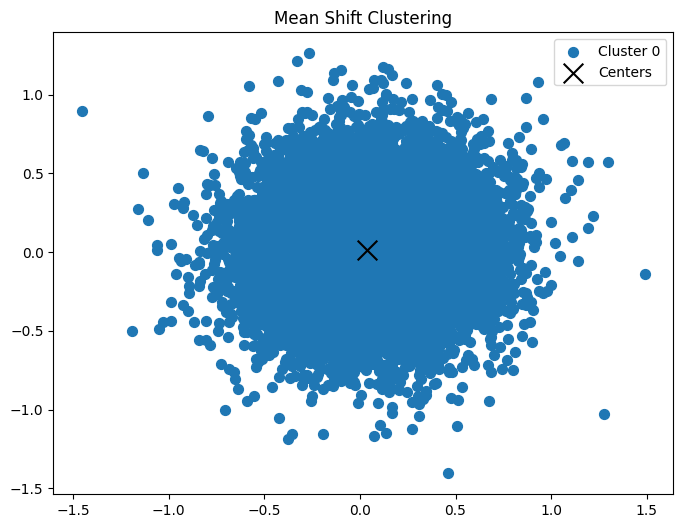

In [14]:
# ترسیم خوشه‌ها
plt.figure(figsize=(8,6))
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))

for k, col in zip(range(n_clusters), colors):
    cluster_members = labels == k
    plt.scatter(X[cluster_members, 0], X[cluster_members, 1], s=50, color=col, label=f'Cluster {k}')

# نمایش مراکز خوشه‌ها
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, color='k', marker='x', label='Centers')
plt.title('Mean Shift Clustering')
plt.legend()
plt.show()

### K-Means Algorithm

In [6]:
k = 4 
model = KMeans(n_clusters = k , random_state = 0)
label = model.fit_predict(X)

In [9]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from networkx.algorithms.community.quality import modularity

def gaussian_weight(dist, sigma):
    if sigma <= 0:
        sigma = 1.0
    return np.exp(-(dist**2) / (2 * sigma**2))

def build_knn_graph(data, n_neighbors=10, sigma=None):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto').fit(data)
    distances, indices = nbrs.kneighbors(data)

    if sigma is None:
        sigma = np.median(distances)
        if sigma == 0:
            sigma = 1.0

    G = nx.Graph()
    n_samples = data.shape[0]
    G.add_nodes_from(range(n_samples))

    for i in range(n_samples):
        for j, dist in zip(indices[i], distances[i]):
            if i == j:
                continue
            w = gaussian_weight(dist, sigma)
            G.add_edge(i, j, weight=float(w))

    return G

def labels_to_communities(labels):
    from collections import defaultdict
    d = defaultdict(set)
    for idx, lab in enumerate(labels):
        d[int(lab)].add(idx)
    return list(d.values())

def compute_modularity(data, labels, n_neighbors=10, sigma=None):
    G = build_knn_graph(data, n_neighbors=n_neighbors, sigma=sigma)
    communities = labels_to_communities(labels)
    mod = modularity(G, communities, weight='weight')
    return mod, G, communities

In [12]:
k = 4
model = KMeans(n_clusters=k, random_state=0)
labels = model.fit_predict(X)

mod_value, G, communities = compute_modularity(X, labels, n_neighbors=10)
mod_value

0.13527701271838155

In [13]:
G